In [4]:
import ringity as rng
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

from utils.layout import Layout

In [5]:
FIBRO_FILE = "VR/fibro/connectivity_FLS11_data.xls"

name = "FLS18 TNF"

In [6]:
d = 115 # threshold

fibro_position_df = pd.read_excel(FIBRO_FILE, sheet_name=name)
D_fibro = squareform(pdist(fibro_position_df[['Position X','Position Y','Position Z']])) # distance matrix

G_fibro = nx.from_numpy_array(np.where(D_fibro > d,0,1)) # create (unweighted) network 
G_fibro = G_fibro.subgraph(max(nx.connected_components(G_fibro), key=len)).copy() # get lcc, in case threshold was chosen too low
    
pos = nx.spring_layout(G_fibro, dim=3)

In [7]:
G_fibro.remove_edges_from(nx.selfloop_edges(G_fibro))
nx.info(G_fibro)

C:\Users\maxst\AppData\Local\Temp\ipykernel_3240\4238979789.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_fibro)


'Graph with 403 nodes and 6866 edges'

In [8]:
layout = Layout(G_fibro, pos)

In [9]:
layout.write("VR/fibro/fibro")

In [10]:
dgm = rng.diagram(G_fibro)

c:\Users\maxst\Repositories\Complex-Network-Analysis-Project\.venv\lib\site-packages\ringity\centralities.py:60: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


Text(0, 0.5, 'time of death')

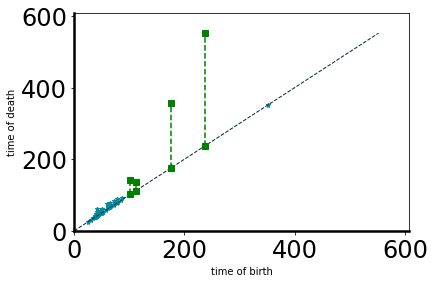

In [11]:
rng.plot_dgm(dgm)
for coordinates in dgm:
    # green line if alive for at least 20
    if coordinates[0]+20 < coordinates[1]:
        plt.plot([coordinates[0],coordinates[0]],[coordinates[0], coordinates[1]], 'gs--')

plt.xlabel('time of birth')
plt.ylabel('time of death')
plt.show()

In [12]:
dgm.ring_score()

0.6648079056159881